<a href="https://colab.research.google.com/github/akalpit23/Interpretable-ML/blob/main/Assignment_03_Interpretable_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIPI 590 - XAI | Assignment #03



### Akalpit Dawkhar

### **Interpretable ML**


In [2]:
!pip install pygam --quiet pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 10.1 MB/s eta 0:00:00


In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod.families import Gamma
from statsmodels.genmod.families.links import Log
from statsmodels.tools import add_constant
from pygam import LinearGAM, GammaGAM, LogisticGAM, s, f
import seaborn as sns

In [4]:
# Please use this to connect your GitHub repository to your Google Colab notebook
# Connects to any needed files from GitHub and Google Drive
import os

# Remove Colab default sample_data
!rm -r ./sample_data

# Clone GitHub files to colab workspace
repo_name = "Interpretable-ML" # Change to your repo name
git_path = 'https://github.com/akalpit23/Interpretable-ML.git' #Change to your path
!git clone "{git_path}"

# Install dependencies from requirements.txt file
#!pip install -r "{os.path.join(repo_name,'requirements.txt')}" #Add if using requirements.txt

# Change working directory to location of notebook
notebook_dir = 'Assignment_03_Interpretable_ML.ipynb'
path_to_notebook = os.path.join(repo_name,notebook_dir)
%cd "{path_to_notebook}"
%ls

Cloning into 'Interpretable-ML'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 12 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (12/12), 166.57 KiB | 1.22 MiB/s, done.
Resolving deltas: 100% (3/3), done.
[Errno 20] Not a directory: 'Interpretable-ML/Assignment_03_Interpretable_ML.ipynb'
/content
Interpretable-ML/


In [5]:
# Loading the data
data = pd.read_csv('/content/Interpretable-ML/Telco-Customer-Churn.csv')

# Display the first few rows of the dataset
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# Convert TotalCharges to numeric, it might have missing values or non-numeric entries
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Drop rows with missing values in 'TotalCharges'
data = data.dropna(subset=['TotalCharges'])
X = data.drop(['customerID', 'Churn'], axis=1)

# converting yes to 1 and no to 0 and store in y
y = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True, dtype= int)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_encoded.head(), y.head()

(   SeniorCitizen  tenure  MonthlyCharges  TotalCharges  gender_Male  \
 0              0       1           29.85         29.85            0   
 1              0      34           56.95       1889.50            1   
 2              0       2           53.85        108.15            1   
 3              0      45           42.30       1840.75            1   
 4              0       2           70.70        151.65            0   
 
    Partner_Yes  Dependents_Yes  PhoneService_Yes  \
 0            1               0                 0   
 1            0               0                 1   
 2            0               0                 1   
 3            0               0                 0   
 4            0               0                 1   
 
    MultipleLines_No phone service  MultipleLines_Yes  ...  \
 0                               1                  0  ...   
 1                               0                  0  ...   
 2                               0                  0  ...  

Accuracy: 0.7256574271499645
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      1033
           1       0.49      0.53      0.51       374

    accuracy                           0.73      1407
   macro avg       0.65      0.66      0.66      1407
weighted avg       0.73      0.73      0.73      1407

Confusion Matrix:
 [[824 209]
 [177 197]]


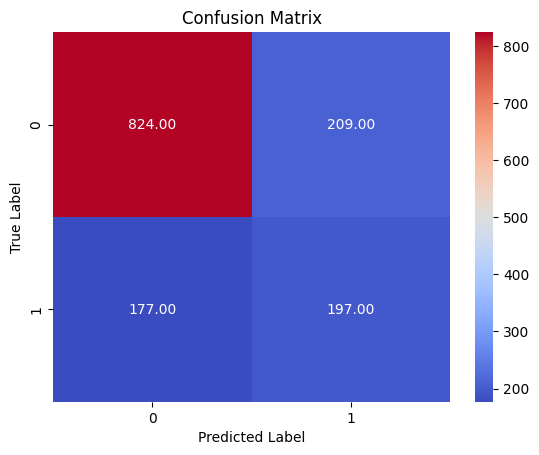

In [7]:
# Train a Decision Tree Classifier
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train_scaled, y_train)

# Predict the test set
y_pred = classifier.predict(X_test_scaled)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


# Print evaluation results
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)

# Confusion matrix heatmap
sns.heatmap(conf_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [8]:
if isinstance(X_train, pd.DataFrame):
    feature_names = X_train.columns
else:
    feature_names = [f"feature_{i}" for i in range(X_train.shape[1])]


# Train a Decision Tree regressor (CART)
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)


DecisionTreeRegressor()

In [9]:
# Check the number of features used to train the regressor
print(f"Number of features used in regressor: {regressor.n_features_in_}")
print(f"Number of columns in data: {len(data.columns)}")

Number of features used in regressor: 30
Number of columns in data: 21


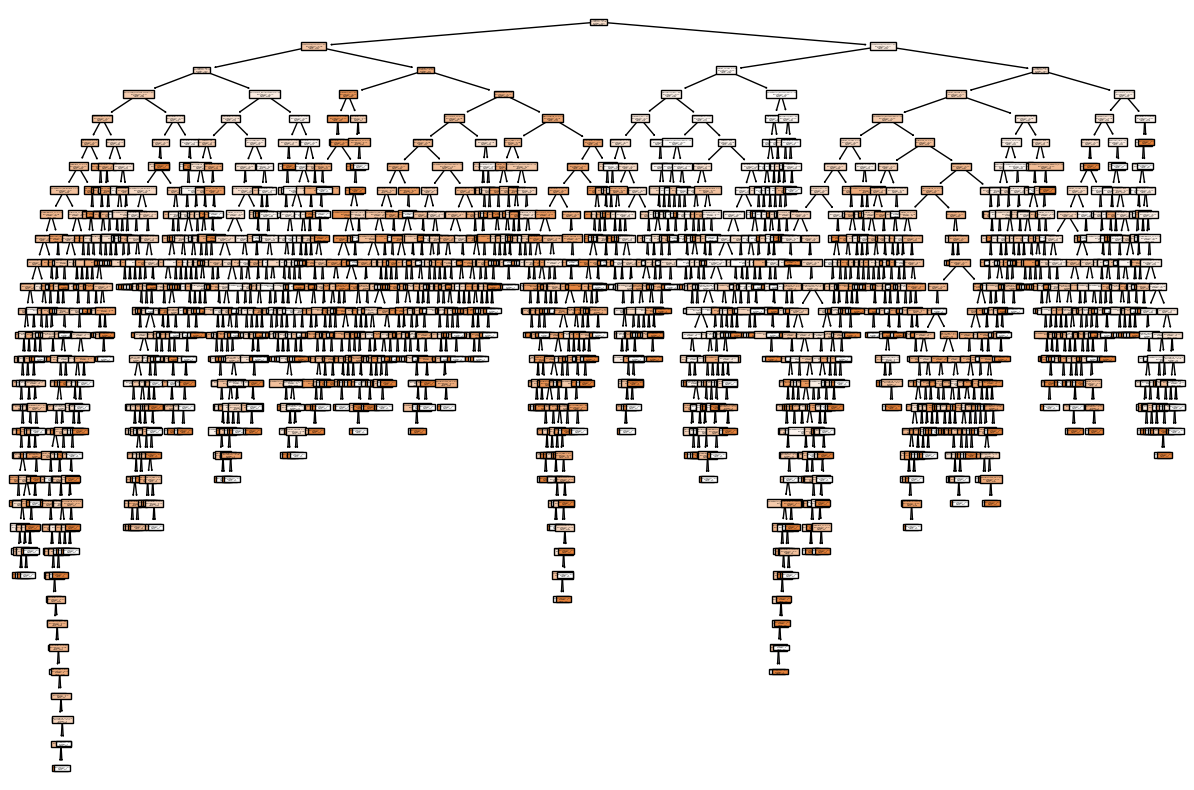

In [10]:
plt.figure(figsize=(15, 10))
plot_tree(regressor, filled=True, feature_names=feature_names)
plt.show()

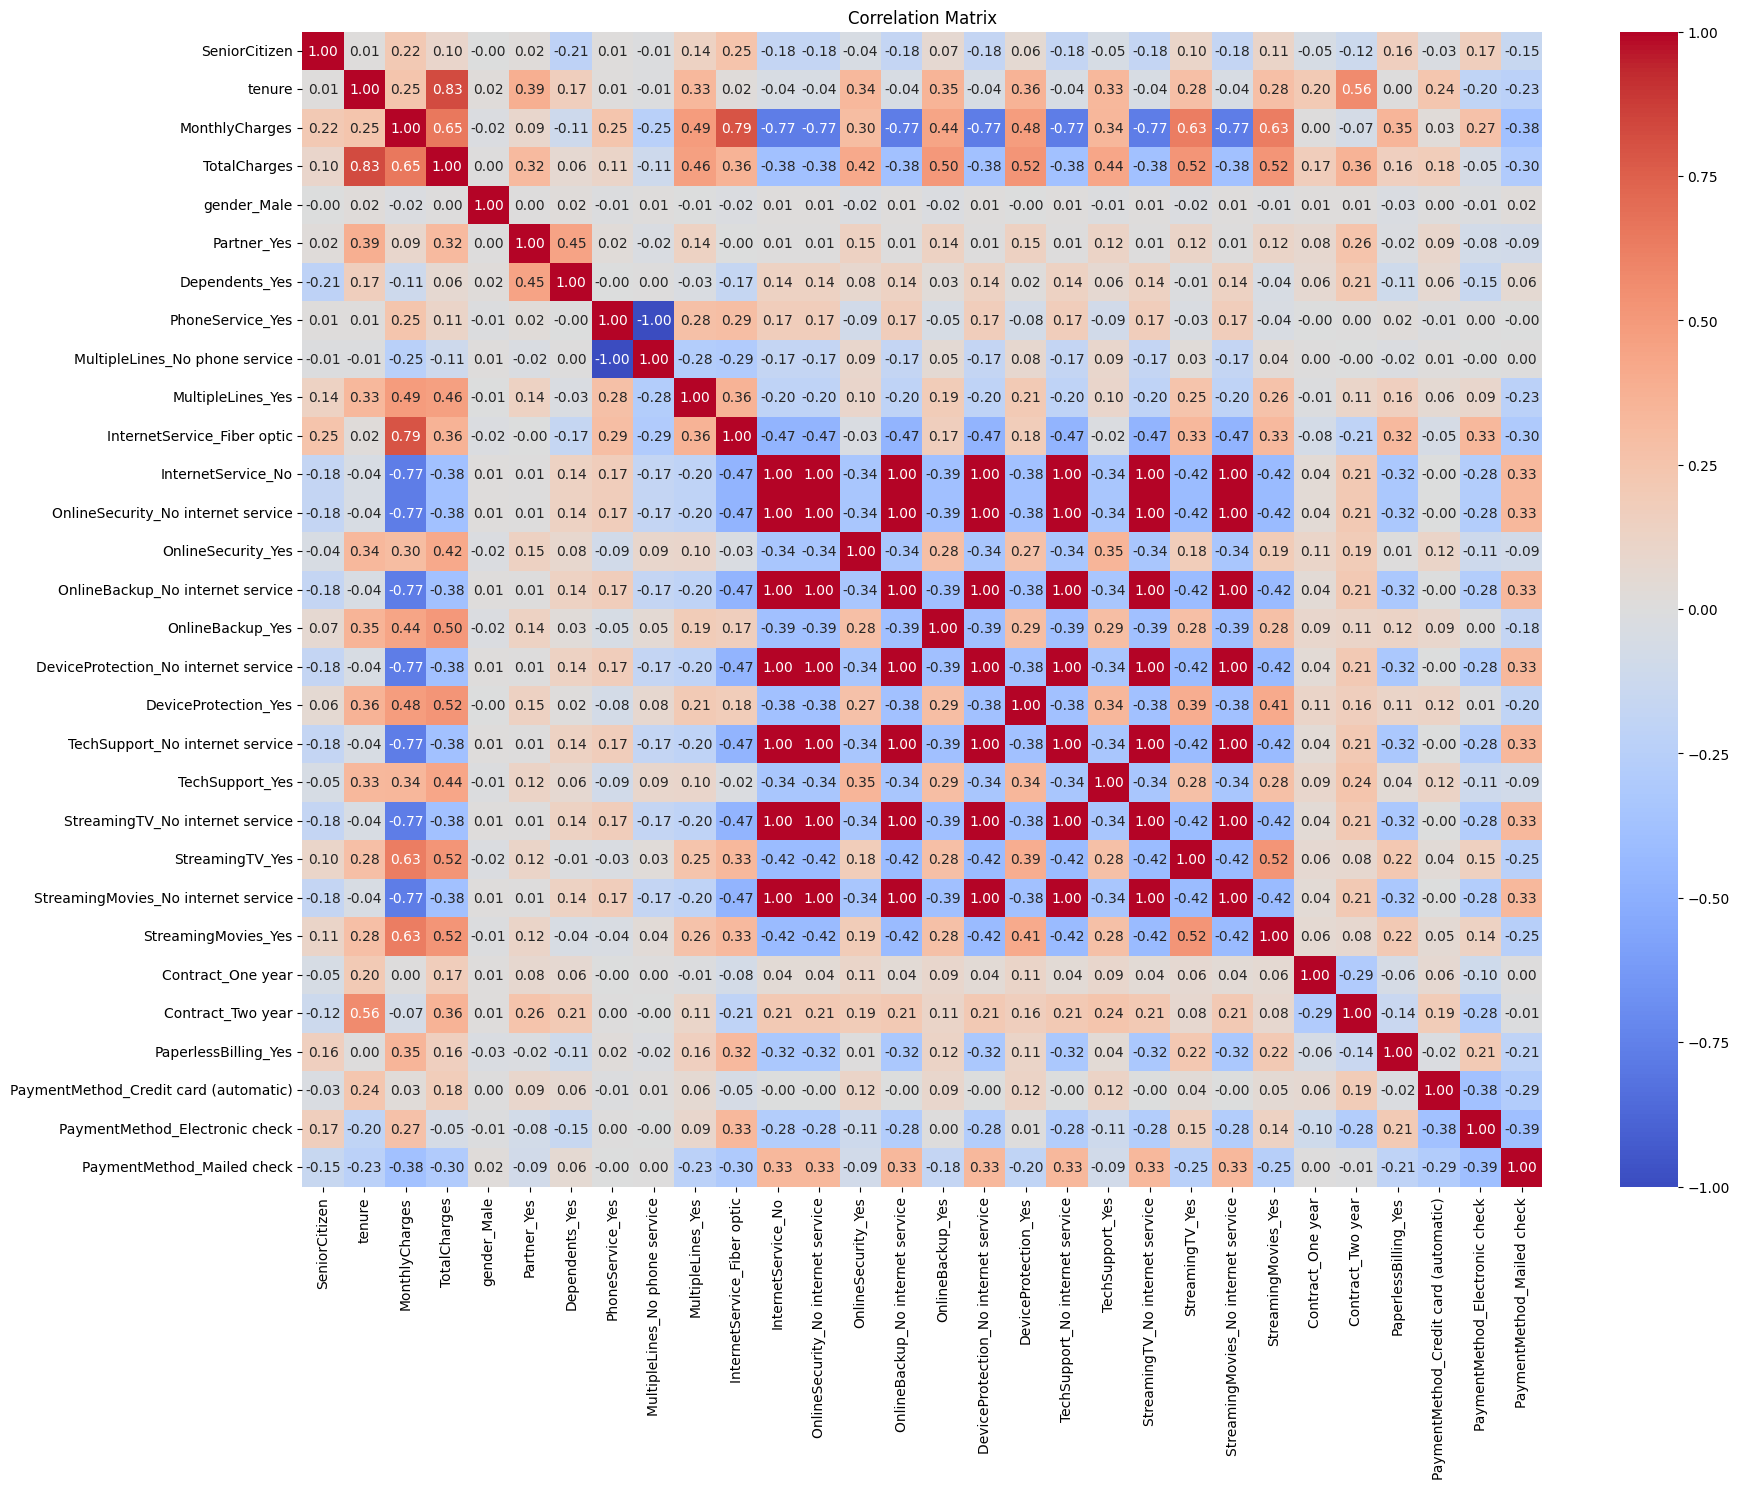

In [11]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)


# 1. Correlation Matrix: Checking multicollinearity between numerical features
plt.figure(figsize=(20, 15))
corr_matrix = X_train_scaled_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [12]:
#y_train_df = pd.DataFrame(y_train, columns=y_train.columns)


# 2. Distribution of Churn (target variable)
#plt.figure(figsize=(6, 4))
#sns.countplot(x='Churn', data=y_train_df, palette='Set2')
#plt.title('Churn Distribution')
#plt.xticks([0, 1], ['No', 'Yes'])
#plt.show()

In [13]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
# Descriptive statistics of the data
desc_stats = data.describe()
print(desc_stats)

       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7032.000000  7032.000000     7032.000000   7032.000000
mean        0.162400    32.421786       64.798208   2283.300441
std         0.368844    24.545260       30.085974   2266.771362
min         0.000000     1.000000       18.250000     18.800000
25%         0.000000     9.000000       35.587500    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.862500   3794.737500
max         1.000000    72.000000      118.750000   8684.800000


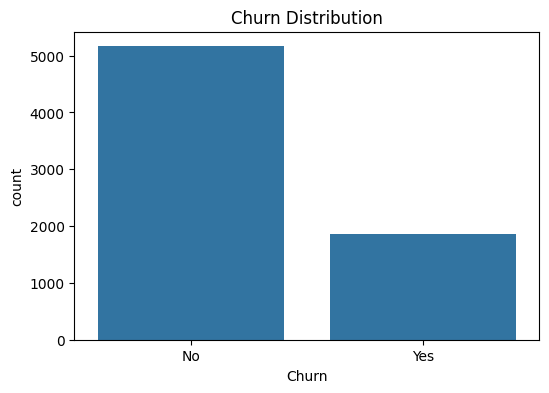

In [15]:
# Churn distribution plot
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=data)
plt.title('Churn Distribution')
plt.show()

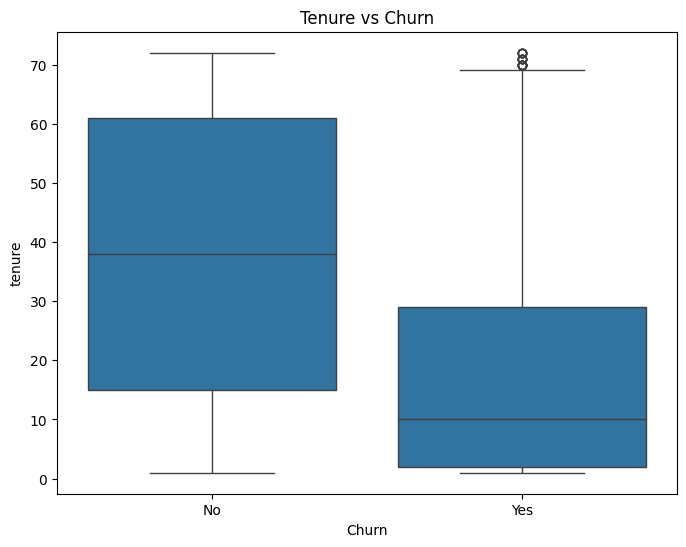

In [16]:
# Feature interaction with Churn (e.g., tenure vs churn)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='tenure', data=data)
plt.title('Tenure vs Churn')
plt.show()

In [17]:
# Linear Regression
linear_model = LinearRegression(fit_intercept=True)
linear_model.fit(X_train_scaled, y_train)
y_pred_lr = linear_model.predict(X_test_scaled)


# Calculate MSE, RMSE, R²
mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lr)

# Output the results
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Mean Squared Error (MSE): 0.1463
Root Mean Squared Error (RMSE): 0.3825
R-squared (R²): 0.2502



Top 10 most influential features:
OnlineBackup_No internet service: 13485144454516.1191
DeviceProtection_No internet service: -5955959301901.0938
StreamingTV_No internet service: -1860772439651.4739
TechSupport_No internet service: -1481627685883.2747
StreamingMovies_No internet service: -1426546179176.7019
OnlineSecurity_No internet service: -1422521192143.2014
InternetService_No: -1337717655760.4685
MultipleLines_No phone service: -158542368958.7054
PhoneService_Yes: -158542368958.6941
InternetService_Fiber optic: 0.1324


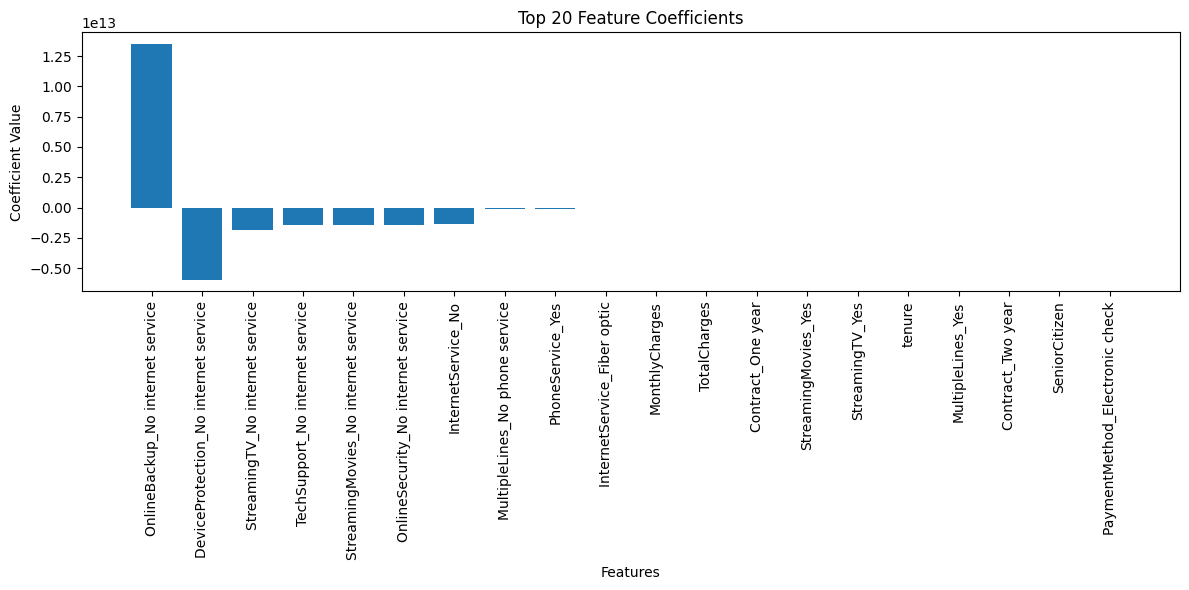

In [18]:
# Get feature names and coefficients
feature_names = X_train.columns
coefficients = linear_model.coef_

# Sort coefficients by absolute value
sorted_indices = np.argsort(np.abs(coefficients))[::-1]
sorted_features = feature_names[sorted_indices]
sorted_coefficients = coefficients[sorted_indices]

# Print top 10 most influential features
print("\nTop 10 most influential features:")
for feature, coef in zip(sorted_features[:10], sorted_coefficients[:10]):
    print(f"{feature}: {coef:.4f}")

# Visualize coefficients
plt.figure(figsize=(12, 6))
plt.bar(range(len(sorted_coefficients[:20])), sorted_coefficients[:20])
plt.xticks(range(len(sorted_coefficients[:20])), sorted_features[:20], rotation=90)
plt.title('Top 20 Feature Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.tight_layout()
plt.show()

In [19]:
# Logistic Regression
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)
y_pred_logistic = logistic_model.predict(X_test_scaled)
y_pred_proba = logistic_model.predict_proba(X_test_scaled)[:, 1]


# Evaluating the Logistic Regression
accuracy = accuracy_score(y_test, y_pred_logistic)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Logistic Regression Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred_logistic))

ROC AUC: 0.8319
Logistic Regression Accuracy: 0.7868
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1033
           1       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407




Top 10 most influential features:
tenure: -1.4407
TotalCharges: 0.6897
InternetService_Fiber optic: 0.6544
MonthlyCharges: -0.6413
Contract_Two year: -0.5692
Contract_One year: -0.3151
StreamingMovies_Yes: 0.2242
StreamingTV_Yes: 0.2146
MultipleLines_Yes: 0.1618
OnlineSecurity_Yes: -0.1549


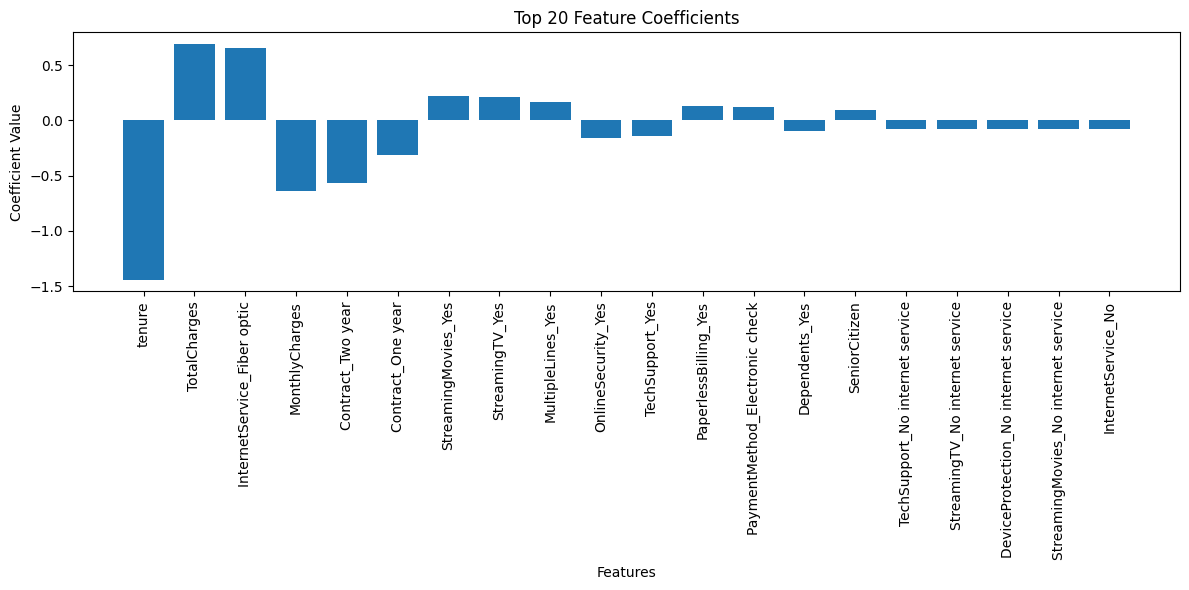

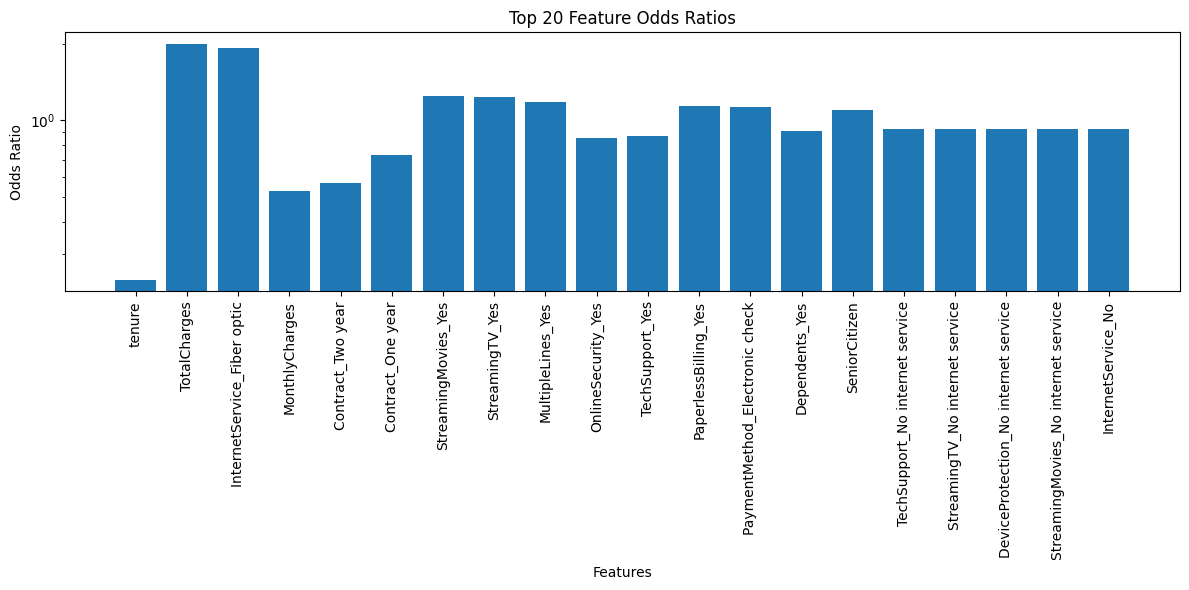

In [20]:
# Get feature names and coefficients
feature_names = X_train.columns
coefficients = logistic_model.coef_[0]

# Sort coefficients by absolute value
sorted_indices = np.argsort(np.abs(coefficients))[::-1]
sorted_features = feature_names[sorted_indices]
sorted_coefficients = coefficients[sorted_indices]

# Print top 10 most influential features
print("\nTop 10 most influential features:")
for feature, coef in zip(sorted_features[:10], sorted_coefficients[:10]):
    print(f"{feature}: {coef:.4f}")

# Visualize coefficients
plt.figure(figsize=(12, 6))
plt.bar(range(len(sorted_coefficients[:20])), sorted_coefficients[:20])
plt.xticks(range(len(sorted_coefficients[:20])), sorted_features[:20], rotation=90)
plt.title('Top 20 Feature Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.tight_layout()
plt.show()

# Calculate and plot odds ratios
odds_ratios = np.exp(sorted_coefficients[:20])
plt.figure(figsize=(12, 6))
plt.bar(range(len(odds_ratios)), odds_ratios)
plt.xticks(range(len(odds_ratios)), sorted_features[:20], rotation=90)
plt.title('Top 20 Feature Odds Ratios')
plt.xlabel('Features')
plt.ylabel('Odds Ratio')
plt.yscale('log')
plt.tight_layout()
plt.show()

In [21]:
# Generalized Additive Model (GAM)
gam = LinearGAM(s(0) + s(1) + s(2))
gam.fit(X_train_scaled, y_train)
y_pred_gam = gam.predict(X_test_scaled)

In [22]:
# Print summary of the GAM model
print(gam.summary())

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     33.8681
Link Function:                     IdentityLink Log Likelihood:                                -13593.8966
Number of Samples:                         5625 AIC:                                            27257.5295
                                                AICc:                                            27257.977
                                                GCV:                                                0.1465
                                                Scale:                                              0.1449
                                                Pseudo R-Squared:                                   0.2618
Feature Function                  Lam

<ipython-input-22-0b526b7329b2>:2: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gam.summary())


In [23]:
# Build GAM model
gam = LogisticGAM(n_splines=10)
gam.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = gam.predict(X_test_scaled)
y_pred_proba = gam.predict_proba(X_test_scaled)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7946
ROC AUC: 0.8355

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1033
           1       0.65      0.50      0.56       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.79      1407



In [24]:
# Print summary of the GAM model
print(gam.summary())

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     37.5176
Link Function:                        LogitLink Log Likelihood:                                 -2259.9659
Number of Samples:                         5625 AIC:                                              4594.967
                                                AICc:                                            4595.5121
                                                UBRE:                                               2.8222
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.3061
Feature Function                  Lam

<ipython-input-24-0b526b7329b2>:2: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gam.summary())


ValueError: num must be an integer with 1 <= num <= 3, not 4

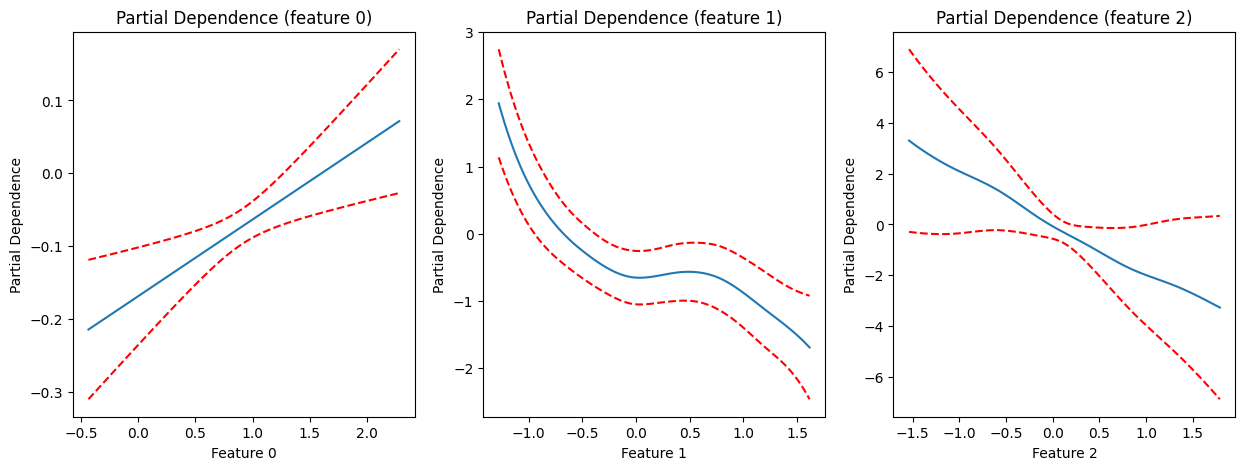

In [25]:
# Plot partial dependence plots for each feature
plt.figure(figsize=(15, 5))
for i, term in enumerate(gam.terms):
    if term.isintercept:
        continue
    plt.subplot(1, 3, i+1)
    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, X=XX, width=0.95)
    plt.plot(XX[:, term.feature], pdep)
    plt.plot(XX[:, term.feature], confi, c='r', ls='--')
    plt.title(f'Partial Dependence (feature {term.feature})')
    plt.xlabel(f'Feature {term.feature}')
    plt.ylabel('Partial Dependence')
plt.tight_layout()
plt.show()

# Calculate and plot feature importance (based on spline term ranges)
feature_importance = []
for term in gam.terms:
    if term.isintercept:
        continue
    XX = gam.generate_X_grid(term=term.feature)
    pdep, _ = gam.partial_dependence(term=term.feature, X=XX)
    importance = pdep.max() - pdep.min()
    feature_importance.append(importance)

plt.figure(figsize=(10, 5))
plt.bar(range(len(feature_importance)), feature_importance)
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(range(len(feature_importance)), [f'Feature {i}' for i in range(len(feature_importance))])
plt.show()

In [ ]:
# ROC Curve for Logistic Regression
fpr, tpr, thresholds = roc_curve(y_test, logistic_model.predict_proba(X_test_scaled)[:,1])
plt.plot(fpr, tpr, label=f"AUC: {roc_auc_score(y_test, logistic_model.predict_proba(X_test_scaled)[:,1]):.4f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()